# Assignment 3

## Data:

- USC licensing data

### To goal is to try to understand what are the most important features and predict "Licensee revenue". 

What columns to use?
    - We are instructed that the football related variables should be in focus, we will pick all variables that are associated with football.

Let's see what we can do

In [19]:
import pandas as pd
import numpy as np
import datetime 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
data = pd.read_csv('/Users/markouskokovic/Desktop/Fall 2020/Marketing Analytics/assignments/3/USCLicenseeData.csv')

In [22]:
data1 = data.copy()

In [23]:
# create a new column that will represent win percentage for football games
data1['win_pct'] = data1['Football Wins'] / (data1['Football Wins'] + data1['Football Losses'])

In [24]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# What columns to use?

### Since football is in focus we will pick all variables that are associated with football.

# Strategy for regression OLS

- We will put in a model all columns that make sense and do "backward elimination"
- Criteria for "backward elimination" is that we will eliminate a variable with the highest p-value until all values are under 0.05 or super close to that value

In [25]:
data1.head()

,FB_Season,Fiscal Year,Licensee Revenue,"""Plus One"" Exclusive Apparel Deal in Place",Home Football Games,Football Wins,Football Losses,Beat_Notre Dame,Beat_UCLA,Pac-12 Conference Champion,Football Bowl Game,Rose-BCS Bowl,Win Bowl Game,National NCAA Football Championship Game,Win Football National Championship,Athletics Under NCAA Sanctions,NFL Draft Picks,First Round NFL Draft Picks,Top 10 NFL Draft Picks,Pro Teams in LA-Market,Avg_Home Game Attendance,Football - Heisman Winner,NCAA-AP Football Ranking,Paul Hackett,Pete Carroll,Lane Kiffin,Ed Orgeon,Steve Sarkisian,Clay Helton,NCAA Basketball Tournament,Pac-12 Basketball Champion,NBA Draft Picks,NBA First Round Draft Picks,Wall Street Journal-Times Higher Ed Ranking,US News Ranking,USC Students,win_pct
0,2000,2001,14431840,0,7,5,7,0,1,0,0,0,0,0,0,0,3,0,0,7,57339,0,NaN,1,0,0,0,0,0,1,0,2,0,NaN,42,29194,0.416667
1,2001,2002,15897720,0,6,6,6,0,1,0,1,0,0,0,0,0,2,0,0,7,57744,0,NaN,0,1,0,0,0,0,1,0,1,0,NaN,35,29813,0.500000
2,2002,2003,17867161,0,6,11,2,1,1,1,1,1,1,0,0,0,5,2,1,7,66853,1,4.0,0,1,0,0,0,0,0,0,0,0,NaN,34,30682,0.846154
3,2003,2004,22857526,0,6,12,1,1,1,1,1,1,1,1,1,0,4,1,0,7,77804,0,1.0,0,1,0,0,0,0,0,0,0,0,NaN,31,31606,0.923077
4,2004,2005,26050926,0,6,13,0,1,1,1,1,1,1,1,1,0,5,1,1,8,85229,1,1.0,0,1,0,0,0,0,0,0,0,0,NaN,30,32160,1.000000


In [26]:
# All relevant columns

football_columns = [
    '"Plus One" Exclusive Apparel Deal in Place',
    'Beat_UCLA', 
    'NFL Draft Picks', 
    'Pro Teams in LA-Market',
    'Football - Heisman Winner', 
    'US News Ranking',
    'Football Wins',
    'Football Bowl Game',
    'Rose-BCS Bowl',
    'Win Bowl Game',
    'Win Football National Championship',
    'First Round NFL Draft Picks',
    'Top 10 NFL Draft Picks',
    'Avg_Home Game Attendance',
    'win_pct',
    'USC Students'
]

In [27]:
# Let's just use 'almost' all and then do 'backward elimination' based on p-values

y = data1['Licensee Revenue']
X = data1[['"Plus One" Exclusive Apparel Deal in Place',
    'Beat_UCLA', 
    'NFL Draft Picks', 
    'Pro Teams in LA-Market',
    'Football - Heisman Winner', 
    'US News Ranking',
    'win_pct',
    'Win Bowl Game',
    'Win Football National Championship',
    'First Round NFL Draft Picks',
    'Top 10 NFL Draft Picks',
    'Avg_Home Game Attendance',
        ]]

xtr, xts, ytr, yts = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [28]:
xtr = sm.add_constant(xtr)
 
model = sm.OLS(ytr, xtr).fit()
predictions = model.predict(xtr) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Licensee Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     192.6
Date:                Fri, 27 Nov 2020   Prob (F-statistic):             0.0563
Time:                        15:21:30   Log-Likelihood:                -185.39
No. Observations:                  14   AIC:                             396.8
Df Residuals:                       1   BIC:                             405.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# To save you some time, I did backward elimination and in the following lines you can see what is the 'best' model.

- R2 = 0.997
- Adjusted R2 = 0.983

### NOTE that there are a couple variables with p-value 0.06. We will keep them.

In [33]:
y = data1['Licensee Revenue']
X1 = data1[['Beat_UCLA', 
            'NFL Draft Picks', 
           'Pro Teams in LA-Market',
            'Football - Heisman Winner', 
           'US News Ranking',
        ]]

xtr, xts, ytr, yts = train_test_split(X1,y, test_size = 0.25, random_state = 0)

In [34]:
xtr = sm.add_constant(xtr)
 
model = sm.OLS(ytr, xtr).fit()
predictions = model.predict(xtr) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Licensee Revenue   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     44.31
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.28e-05
Time:                        15:24:50   Log-Likelihood:                -216.11
No. Observations:                  14   AIC:                             444.2
Df Residuals:                       8   BIC:                             448.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [39]:
# LinearRegression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1, y)


some_data = X1.iloc[:5]
some_labels = y.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data))

print("Labels:\t\t", list(some_labels))

Predictions:	 [14700133.73878166 17599411.85968832 20656017.75136437 22551500.12616104
 24366577.89403742]
Labels:		 [14431840, 15897720, 17867161, 22857526, 26050926]


In [40]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X1)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:\t\t", lin_rmse)

RMSE:		 2430146.9040977005


In [41]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, predictions)
print("MAE:\t\t", lin_mae)

MAE:		 2058305.987856003


In [42]:
# RIDGE

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="auto", random_state=42)
ridge_reg.fit(X1, y)
predictions = ridge_reg.predict(X1)

ridge_mse = mean_squared_error(y, predictions)
ridge_rmse = np.sqrt(ridge_mse)


# LASSO

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X1, y)
predictions = lasso_reg.predict(X1)

lasso_mse = mean_squared_error(y, predictions)
lasso_rmse = np.sqrt(lasso_mse)


# ELASTIC NET

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X1, y)
predictions = elastic_net.predict(X1)

elastic_net_mse = mean_squared_error(y, predictions)
elastic_net_rmse = np.sqrt(elastic_net_mse)

print("RIDGE RMSE:\t\t", ridge_rmse)
print("LASSO RMSE:\t\t", lasso_rmse)
print("ELASTIC NET RMSE:\t\t", elastic_net_rmse)

RIDGE RMSE:		 2482872.499971882
LASSO RMSE:		 2430146.904097711
ELASTIC NET RMSE:		 2479082.6548440694


In [43]:
# Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X1, y)

predictions = tree_reg.predict(X1)
tree_mse = mean_squared_error(y, predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision tree regressor RMSE:\t\t", tree_rmse)

Decision tree regressor RMSE:		 0.0


In [45]:
# cross validatation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X1, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [2800011.44868392 3316567.045383   3747232.06321046 5842107.94480006
 3394760.23874912 5569038.32822584 7033057.59942864 6015169.08339342
 4654486.97824035 3706073.        ]
Mean: 4607850.373011482
Standard deviation: 1351768.2213819444


In [47]:
lin_scores = cross_val_score(lin_reg, X1, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4308135.51474934 3253616.45328219 4584701.17517542 4762271.84930844
 1990332.16104507 2663360.67599824 5390172.76302948 4048169.73370609
 2294802.0444965  9850004.05229609]
Mean: 4314556.642308686
Standard deviation: 2132510.9269966576


In [48]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X1, y)

predictions = forest_reg.predict(X1)
forest_mse = mean_squared_error(y, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2348622.8354240693

In [49]:
# cross valid

forest_scores = cross_val_score(forest_reg, X1, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [9125434.29687956 5391716.93605446 2601919.63384787 4450394.55439268
 1603628.43884736 3442544.17466421 6877079.56171086 3476811.66318276
 2890622.06256882 2335643.2       ]
Mean: 4219579.452214858
Standard deviation: 2201993.5247518364


In [50]:
# SVM

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X1, y)
predictions = svm_reg.predict(X1)
svm_mse = mean_squared_error(y, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

6960523.933037093

In [51]:
# grid search

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X1, y)

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/markouskokovic/opt/anaconda3/l

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
# best params
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}

In [53]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=3,
                      random_state=42)

In [54]:
# let's see the result for each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5742502.458093617 {'max_features': 2, 'n_estimators': 3}
6394472.416641633 {'max_features': 2, 'n_estimators': 10}
6564163.033757089 {'max_features': 2, 'n_estimators': 30}
7385864.211377626 {'max_features': 4, 'n_estimators': 3}
6828195.368834117 {'max_features': 4, 'n_estimators': 10}
6539679.507078843 {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
5623322.225544103 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6159509.35840132 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6846700.271019168 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6181321.436857716 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
6066283.102033544 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
636231

In [55]:
# randomized grid search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X1, y)

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/markouskokovic/opt/anaconda3/l

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb39943ab20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb399410820>},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 7, 'n_estimators': 180}
6772568.20740759 {'max_features': 5, 'n_estimators': 15}
6483126.558747304 {'max_features': 3, 'n_estimators': 72}
6572320.384274881 {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
6496515.911461951 {'max_features': 3, 'n_estimators': 75}
6423333.948259419 {'max_features': 3, 'n_estimators': 88}
6301409.1973682325 {'max_features': 5, 'n_estimators': 100}
6302453.659876959 {'max_features': 3, 'n_estimators': 150}
7129179.628336975 {'max_features': 5, 'n_estimators': 2}


In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.10904506, 0.20275403, 0.41839023, 0.0113716 , 0.25843908])

In [58]:
names = X1.columns
names

Index(['Beat_UCLA', 'NFL Draft Picks', 'Pro Teams in LA-Market', 'Football - Heisman Winner', 'US News Ranking'], dtype='object')

### Feature importance

In [59]:
f_i = sorted(zip(feature_importances, X1.columns), reverse = True)
pd.DataFrame(f_i, columns = ['f_i_score', 'variable'])

,f_i_score,variable
0,0.418390,Pro Teams in LA-Market
1,0.258439,US News Ranking
2,0.202754,NFL Draft Picks
3,0.109045,Beat_UCLA
4,0.011372,Football - Heisman Winner


In [63]:
# final model

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X1)

final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.0

# Let's try to better understand what is going on with the data

### Let's plot the revenue over years

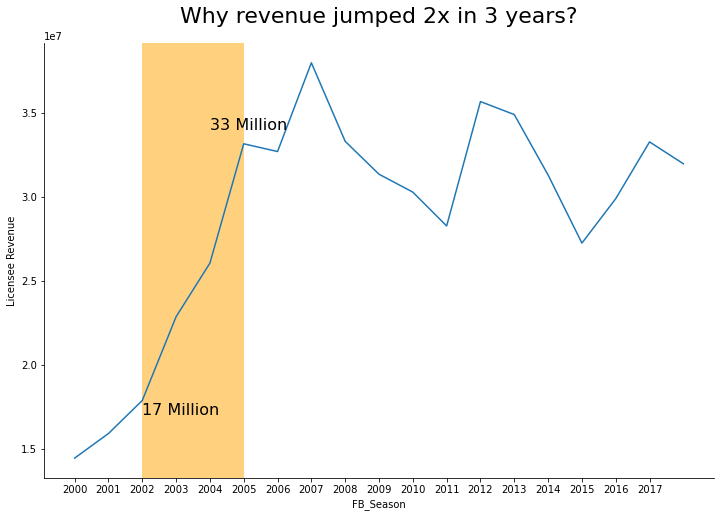

In [75]:
plt.figure(figsize = (12,8))

sns.lineplot(data = data1, x = 'FB_Season', y = 'Licensee Revenue')

plt.title('Why revenue jumped 2x in 3 years?' , fontsize = 22, pad = 20)

plt.xticks(np.arange(2000, 2018, 1))
plt.axvspan(2002, 2005, facecolor='orange', alpha=0.5)

plt.text(2002, 17000000, '17 Million', fontsize=16)
plt.text(2004, 34000000, '33 Million', fontsize=16)




sns.despine()

plt.show()

### Revenue jumped 2x in 3 years, 2002 - 2005 and after that it's been in 30-35 million range

- it would be great to understand what was the main driver of that change
- Maybe we can exclude years before 2005 and try to run analysis again to see would that give any new insights

# Let's see what happens if we use only data > year 2005

In [79]:
data2 = data1[6:]

In [ ]:
# columns we can try
'"Plus One" Exclusive Apparel Deal in Place',
    'Beat_UCLA', 
    'NFL Draft Picks', 
    'Pro Teams in LA-Market',
    'Football - Heisman Winner', 
    'US News Ranking',
    'Football Wins',
    'Football Bowl Game',
    'Rose-BCS Bowl',
    'Win Bowl Game',
    'Win Football National Championship',
    'First Round NFL Draft Picks',
    'Top 10 NFL Draft Picks',
    'Avg_Home Game Attendance',
    'win_pct',
    'USC Students'

## Let's firstly try the columns that gave the best result when all years are used

In [93]:
y = data2['Licensee Revenue']
X1 = data2[['Beat_UCLA', 
            'NFL Draft Picks', 
           'Pro Teams in LA-Market',
            'Football - Heisman Winner', 
           'US News Ranking'
        ]]

xtr, xts, ytr, yts = train_test_split(X1,y, test_size = 0.25, random_state = 0)

In [94]:
xtr = sm.add_constant(xtr)
 
model = sm.OLS(ytr, xtr).fit()
predictions = model.predict(xtr) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Licensee Revenue   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.173
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.441
Time:                        15:40:24   Log-Likelihood:                -143.66
No. Observations:                   9   AIC:                             297.3
Df Residuals:                       4   BIC:                             298.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##  R2 = 0.54 and adjusted R2 = 0.079. Also no variable has p-value < 0.05.

## For that reason let's now try "forward selection" approach

In [95]:
# forward selection

y = data2['Licensee Revenue']
X1 = data2[[
     'Beat_UCLA', 
      'NFL Draft Picks']]

xtr, xts, ytr, yts = train_test_split(X1,y, test_size = 0.25, random_state = 0)

In [96]:
xtr = sm.add_constant(xtr)
 
model = sm.OLS(ytr, xtr).fit()
predictions = model.predict(xtr) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Licensee Revenue   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     3.222
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.112
Time:                        15:40:31   Log-Likelihood:                -143.87
No. Observations:                   9   AIC:                             293.7
Df Residuals:                       6   BIC:                             294.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.884e+07   2.04e+06     

### We can see that only 'NFL Draft Picks' column has p-value < 0.05

### After many iterations this is the best result. We decided to keep 'Beat_UCLA' even though p-value is > 0.05. If we add any other variable R2 might go up a little bit but adjusted R2 decreased significantly.


## Let's try to find the lowest RMSE score

In [97]:
# LinearRegression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1, y)


some_data = X1.iloc[:5]
some_labels = y.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data))

print("Labels:\t\t", list(some_labels))

Predictions:	 [33659862.99788956 33419175.23812874 34002783.23461132 31668351.24868097
 32835567.24164615]
Labels:		 [32698490, 37987067, 33306467, 31348295, 30280223]


In [98]:
# RIDGE

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="auto", random_state=42)
ridge_reg.fit(X1, y)
predictions = ridge_reg.predict(X1)

ridge_mse = mean_squared_error(y, predictions)
ridge_rmse = np.sqrt(ridge_mse)


# LASSO

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X1, y)
predictions = lasso_reg.predict(X1)

lasso_mse = mean_squared_error(y, predictions)
lasso_rmse = np.sqrt(lasso_mse)


# ELASTIC NET

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X1, y)
predictions = elastic_net.predict(X1)

elastic_net_mse = mean_squared_error(y, predictions)
elastic_net_rmse = np.sqrt(elastic_net_mse)

print("RIDGE RMSE:\t\t", ridge_rmse)
print("LASSO RMSE:\t\t", lasso_rmse)
print("ELASTIC NET RMSE:\t\t", elastic_net_rmse)

RIDGE RMSE:		 2375139.850284315
LASSO RMSE:		 2341228.679029853
ELASTIC NET RMSE:		 2358956.3206774886


In [120]:
# Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X1, y)

predictions = tree_reg.predict(X1)
tree_mse = mean_squared_error(y, predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision tree regressor RMSE:\t\t", tree_rmse)

Decision tree regressor RMSE:		 1387779.8638913273


In [118]:
dtr_scores = cross_val_score(tree_reg, X1, y,
                             scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)
display_scores(dtr_rmse_scores)

Scores: [5507253.11295732 3466822.45462621 5628835.54297859 3706073.
 1078636.5        1395734.         6028207.          370390.5
 6028207.         3706073.        ]
Mean: 3691623.211056213
Standard deviation: 2028519.107147439


In [100]:
# cross validatation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X1, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [101]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [5507253.11295732 3466822.45462621 5628835.54297859 3706073.
 1078636.5        1395734.         6028207.          370390.5
 6028207.         3706073.        ]
Mean: 3691623.211056213
Standard deviation: 2028519.107147439


In [102]:
lin_scores = cross_val_score(lin_reg, X1, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4544777.51582693 1003680.71281906 2531131.59426477 3258733.59303351
 3118572.91575592 3849195.54742173 3434598.81509946  730669.20822838
 4313227.81283906 1386930.22486772]
Mean: 2817151.7940156544
Standard deviation: 1293234.9606339373


In [104]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X1, y)

predictions = forest_reg.predict(X1)
forest_mse = mean_squared_error(y, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1876846.8129211273

In [105]:
# cross valid

forest_scores = cross_val_score(forest_reg, X1, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5052091.72684807  922785.85766647 4150317.55377975 2989377.7
 3023302.825      1617814.475      5527494.5        1073681.31666667
 4795875.15       2746259.33333333]
Mean: 3189900.043829429
Standard deviation: 1574423.25740588


In [106]:
# SVM

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X1, y)
predictions = svm_reg.predict(X1)
svm_mse = mean_squared_error(y, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

2863665.750720045

In [107]:
# grid search

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X1, y)

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/markouskokovic/opt/anaconda3/l

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
# best params
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [109]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [110]:
# let's see the result for each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4184025.413420889 {'max_features': 2, 'n_estimators': 3}
3986524.088383629 {'max_features': 2, 'n_estimators': 10}
3934601.3629443087 {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
4519552.825454453 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4519552.825454453 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [113]:
# randomized grid search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X1, y)

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/markouskokovic/opt/anaconda3/l

ValueError: max_features must be in (0, n_features]

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [114]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.28759258, 0.71240742])

In [115]:
names = X1.columns
names

Index(['Beat_UCLA', 'NFL Draft Picks'], dtype='object')

In [116]:
f_i = sorted(zip(feature_importances, X1.columns), reverse = True)
pd.DataFrame(f_i, columns = ['f_i_score', 'variable'])

,f_i_score,variable
0,0.712407,NFL Draft Picks
1,0.287593,Beat_UCLA


In [117]:
# final model

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X1)

final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1805140.5565860851

# Ideas what data could be useful for future analysis

- All relevant data between USC and licencees... royalties, terms, sales,...product approval process data, distribution, guarantees, advances,...

- breakdown of revenue by sectors like education, graduation, sports,...
- product categories
- partners / co-branding
- month-to-month data vs year-to-year data vs quarter-to-quarter data
    - if we have something better than y-to-y data we might be able to make TIME SERIES models like ARIMA or something like that that will help them with budgeting
- any data on infringement to understand potential losses

